# Credit Card Fraud Detection
---

## *Introduction*
This is my approach to the Kaggle Data Project: https://www.kaggle.com/mlg-ulb/creditcardfraud<br>
*Description quoted from the data website:*<br>
***"The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions."***

Our goal is to predict whether a credit card transaction is fraud, using machine learning.<br>
The base model we have chosen is a *Gradient Boosting Classifier* model.

## Imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

## Read CSV
CAUTION: SEMI-LARGE FILE<br>
Please download it from the website provided in here:<br>
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [5]:
#df=pd.read_csv('your_own_csv.csv')
df=pd.read_csv('creditcard.csv')

# Inspection

In [6]:
df.shape

(284807, 31)

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
class_ = {0:'Not Fraud', 1:'Fraud'}
df.Class.value_counts().rename(index = class_)

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64

**Hence, We do not seem to have balanced data. (i.e. imbalanced class ratio)**

## Features, Classes Loading

In [87]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

## Check for Feature Importance (Optional, Industrial Use)
This section is for checking the importance of our features.<br>
***Letting the client(s) know the ranking of feature importance in determining a fraud, can provide them with extra insights in what indicates a credit card fraud.***<br>
However, since the real meaning of each feature is hidden from us, we do not need to do this part.<br>

In [ ]:
tst_frst=ExtraTreesClassifier(n_estimators=200)
tst_frst.fit(x, y)
importance=tst_frst.feature_importances_
std=np.std([tree.feature_importances_ for tree in tst_frst.estimators_], axis=0)
ft_idx = np.argsort(importance)[::-1]
print(f'Most important features ranked:{str(ft_idx)}')

***After you run this segment, features randked from most important to least important:***<br>
***[16 13 11 15 10  9 17  3  8  2  6 20 18  1 25  4  7 19  5 21  0 14 23 26 28 27 12 24 22]***

## Train/Test Split
We do not seem to have a lot of fraud-labeled data, hence we split with 8:2 for train:test.

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Model Training

In [84]:
model=GradientBoostingClassifier()

In [90]:
model.fit(x_train, y_train)

GradientBoostingClassifier()

## Model Evaluation

In [93]:
pred=model.predict(x_test)

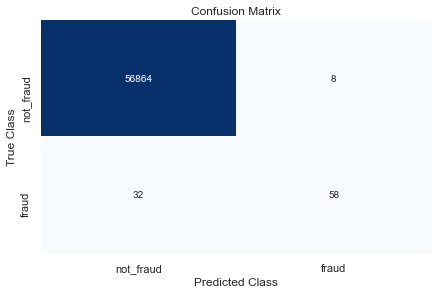

In [94]:
cls_names=['not_fraud', 'fraud']
mtx=confusion_matrix(y_test, pred)
dataframe=pd.DataFrame(mtx, index=cls_names, columns=cls_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [101]:
sensitivity = round(recall_score(y_test, pred), 3)
accuracy = round(accuracy_score(y_test, pred), 3)
print(f"Gradient Boosting Model Sensitivity: {sensitivity}")
print(f"Gradient Boosting Model Accuracy: {accuracy}")

Gradient Boosting Model Sensitivity: 0.644
Gradient Boosting Model Accuracy: 0.999


## Summary

Since we have significantly imbalanced classes, the final model may be affected by the way we split for the training and the testing data. <br>
We have chosen ***Gradient Boosting Classifier*** for classifying and predicting our outcome, since this classifier is an ensemble method which gathers various models to create a stronger final one.<br>
Our final model shows a prediction accuracy of 0.99 with 80% training data and 20% testing data, which means very accurate.<br>
However, 0.64 sensitivity/recall score suggests very imbalanced data, which we do need to consider *Randomness* in mind as well since we split our train/test data randomly.<br>
We have also concluded that the most influencing features are ranked (most to least):<br>
[16 13 11 15 10  9 17  3  8  2  6 20 18  1 25  4  7 19  5 21  0 14 23 26 28 27 12 24 22]

***Lastly, Thank You Very Much!***